In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.metrics as metrics


In [2]:
kmeans_thesis_df_path = "s3://lgo-theses-test/kmeans_thesis_df.csv"
comprehend_top_topics_path = "s3://lgo-theses-test/comprehend_results/doc-topics.csv"
kmeans_thesis_df_path_unpivot = "s3://lgo-theses-test/kmeans_thesis_df_.csv"

In [3]:
kmeans_thesis_df = pd.read_csv(kmeans_thesis_df_path)
comprehend_top_topics = pd.read_csv(comprehend_top_topics_path)
test_df = pd.read_csv("s3://lgo-theses-test/kmeans_thesis_df_1.csv")

In [4]:
kmeans_thesis_df.head()

,Unnamed: 0,0,filenames,FIRST_NAME_x,LAST_NAME_x,THESIS_TITLE,CLASS_x,THESIS_TITLE.1,Theses,MIT_ID,...,cluster_label,industry_aero,industry_attire,industry_auto,industry_consumer,industry_healthcare,industry_hitech,industry_rawmaterials,industry_utilities,industry_notknown
0,0,Accelerating the Development of Complex Produc...,Dawson FINAL Thesis Text,Benjamin,Dawson,Accelerating the Development of Complex Produc...,2011,Dawson FINAL Thesis Text.pdf,Accelerating the Development of Complex Produc...,979234733.0,...,1.0,1,0,0,0,0,0,0,0,0
1,1,Constraint Analysis and Throughput Improvement...,valdes03thesis,Jose,Valdes,Constraint Analysis And Throughput Improvement...,2003,valdes03thesis.pdf,Constraint Analysis and Throughput Improvement...,921923011.0,...,8.0,0,0,0,0,0,0,0,0,1
2,2,Product Development Process Postmortem Assessm...,kacand97,Peter,Kacandes,Product Development Process Postmortem Assessment,1997,kacand97.pdf,Product Development Process Postmortem Assessm...,958727061.0,...,8.0,0,0,0,0,0,0,0,0,1
3,3,Inventory Optimization Model for NIKE’s Long L...,20150414 MIT Thesis - John Kang v24 Single spaced,John,Kang,Inventory Optimization Model for NIKEs Long-L...,2015,20150414 MIT Thesis - John Kang v24 Single spa...,Inventory Optimization Model for NIKE’s Long L...,962462852.0,...,4.0,0,1,0,0,0,0,0,0,0
4,4,This page has been intentionally left blank. ...,Thesis - Supply Chain Risk Management - Daniel...,Daniel,Schoerner,Developing a Process for Supply Chain Risk Man...,2009,Thesis - Supply Chain Risk Management - Daniel...,This page has been intentionally left blank. ...,929632340.0,...,6.0,0,0,0,0,0,1,0,0,0


In [4]:
comprehend_top_topics.head()

,docname,topic,proportion
0,semmel92.txt,25,0.756461
1,semmel92.txt,1,0.112598
2,semmel92.txt,14,0.055696
3,semmel92.txt,2,0.044415
4,semmel92.txt,0,0.018624


In [5]:
comprehend_top_topics['filenames'] = comprehend_top_topics['docname'].str.replace('.txt', '')

In [7]:
merged_df_for_analysis = test_df.merge(comprehend_top_topics, on=['filenames'])

In [9]:
comprehend_top_topics = pd.get_dummies(comprehend_top_topics,columns=['topic'])
comprehend_top_topics_agg = comprehend_top_topics.drop(columns=['proportion','docname'])

In [10]:
comprehend_top_topics_agg = comprehend_top_topics.groupby(['filenames']).sum()

In [11]:
comprehend_top_topics_agg = comprehend_top_topics_agg.drop(columns=['proportion'])

In [12]:
comprehend_top_topics_agg.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
filenames,,,,,,,,,,,,,,,,,,,,,
050428 McKenney Thesis v8,1,0,1,0,0,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1
060524 Ian MacDonald Thesis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
080516 Thesis Kristinsdottir,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2013-03-31_LGO_Thesis_Cooper-Davis,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2015-05-11 Kimball thesis vFinal,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0


In [13]:
merged_df_for_explainer = kmeans_thesis_df.merge(comprehend_top_topics_agg, on=['filenames'])


In [14]:
merged_df_for_explainer.head()

,Unnamed: 0,0,filenames,FIRST_NAME_x,LAST_NAME_x,THESIS_TITLE,CLASS_x,THESIS_TITLE.1,Theses,MIT_ID,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
0,0,Accelerating the Development of Complex Produc...,Dawson FINAL Thesis Text,Benjamin,Dawson,Accelerating the Development of Complex Produc...,2011,Dawson FINAL Thesis Text.pdf,Accelerating the Development of Complex Produc...,979234733.0,...,0,1,1,1,0,0,0,0,1,0
1,1,Constraint Analysis and Throughput Improvement...,valdes03thesis,Jose,Valdes,Constraint Analysis And Throughput Improvement...,2003,valdes03thesis.pdf,Constraint Analysis and Throughput Improvement...,921923011.0,...,1,0,1,0,0,0,0,0,0,0
2,2,Product Development Process Postmortem Assessm...,kacand97,Peter,Kacandes,Product Development Process Postmortem Assessment,1997,kacand97.pdf,Product Development Process Postmortem Assessm...,958727061.0,...,0,0,0,0,0,1,0,0,1,1
3,3,Inventory Optimization Model for NIKE’s Long L...,20150414 MIT Thesis - John Kang v24 Single spaced,John,Kang,Inventory Optimization Model for NIKEs Long-L...,2015,20150414 MIT Thesis - John Kang v24 Single spa...,Inventory Optimization Model for NIKE’s Long L...,962462852.0,...,0,0,0,1,0,0,0,0,0,0
4,4,This page has been intentionally left blank. ...,Thesis - Supply Chain Risk Management - Daniel...,Daniel,Schoerner,Developing a Process for Supply Chain Risk Man...,2009,Thesis - Supply Chain Risk Management - Daniel...,This page has been intentionally left blank. ...,929632340.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
merged_df_for_explainer.columns

Index(['Unnamed: 0', '0', 'filenames', 'FIRST_NAME_x', 'LAST_NAME_x',
       'THESIS_TITLE', 'CLASS_x', 'THESIS_TITLE.1', 'Theses', 'MIT_ID',
       'PERSON_ID', 'FIRST_NAME_y', 'LAST_NAME_y', 'CLASS_y', 'ENG_DEPT',
       'INTERNSHIP_COMPANY', 'thesis_id', 'industry_cat', '0.1',
       'cluster_label', 'industry_aero', 'industry_attire', 'industry_auto',
       'industry_consumer', 'industry_healthcare', 'industry_hitech',
       'industry_rawmaterials', 'industry_utilities', 'industry_notknown',
       'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11',
       'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17',
       'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23',
       'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29'],
      dtype='object')

In [16]:
merged_df_for_explainer = merged_df_for_explainer.dropna()

In [17]:
feature_columns = ['CLASS_x','industry_aero','industry_attire','industry_auto','industry_consumer','industry_healthcare','industry_hitech',
                  'industry_rawmaterials','industry_utilities','industry_notknown','topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8',
                  'topic_9','topic_10','topic_11','topic_12','topic_13','topic_14','topic_15','topic_16','topic_17','topic_18','topic_19','topic_20','topic_21','topic_22',
                  'topic_23','topic_24','topic_25','topic_26','topic_27','topic_28','topic_29']
target_label = ['cluster_label']
#'ENG_DEPT','INTERNSHIP_COMPANY',

In [18]:
X = merged_df_for_explainer[feature_columns]
y=merged_df_for_explainer[target_label]
y['cluster_label']=y['cluster_label'].astype(str)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [118]:
X.head()

,CLASS_x,industry_aero,industry_attire,industry_auto,industry_consumer,industry_healthcare,industry_hitech,industry_rawmaterials,industry_utilities,industry_notknown,...,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29
0,2011,1,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
3,2015,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2009,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2013,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2017,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y.head()

,cluster_label
0,1.0
1,8.0
2,8.0
3,4.0
4,6.0


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21, stratify=y['cluster_label'])

In [121]:
dtree_model = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

In [122]:
cluster_labels = y['cluster_label'].unique().tolist()
cluster_labels_names = [str(i) for i in cluster_labels]
len(cluster_labels_names)

10

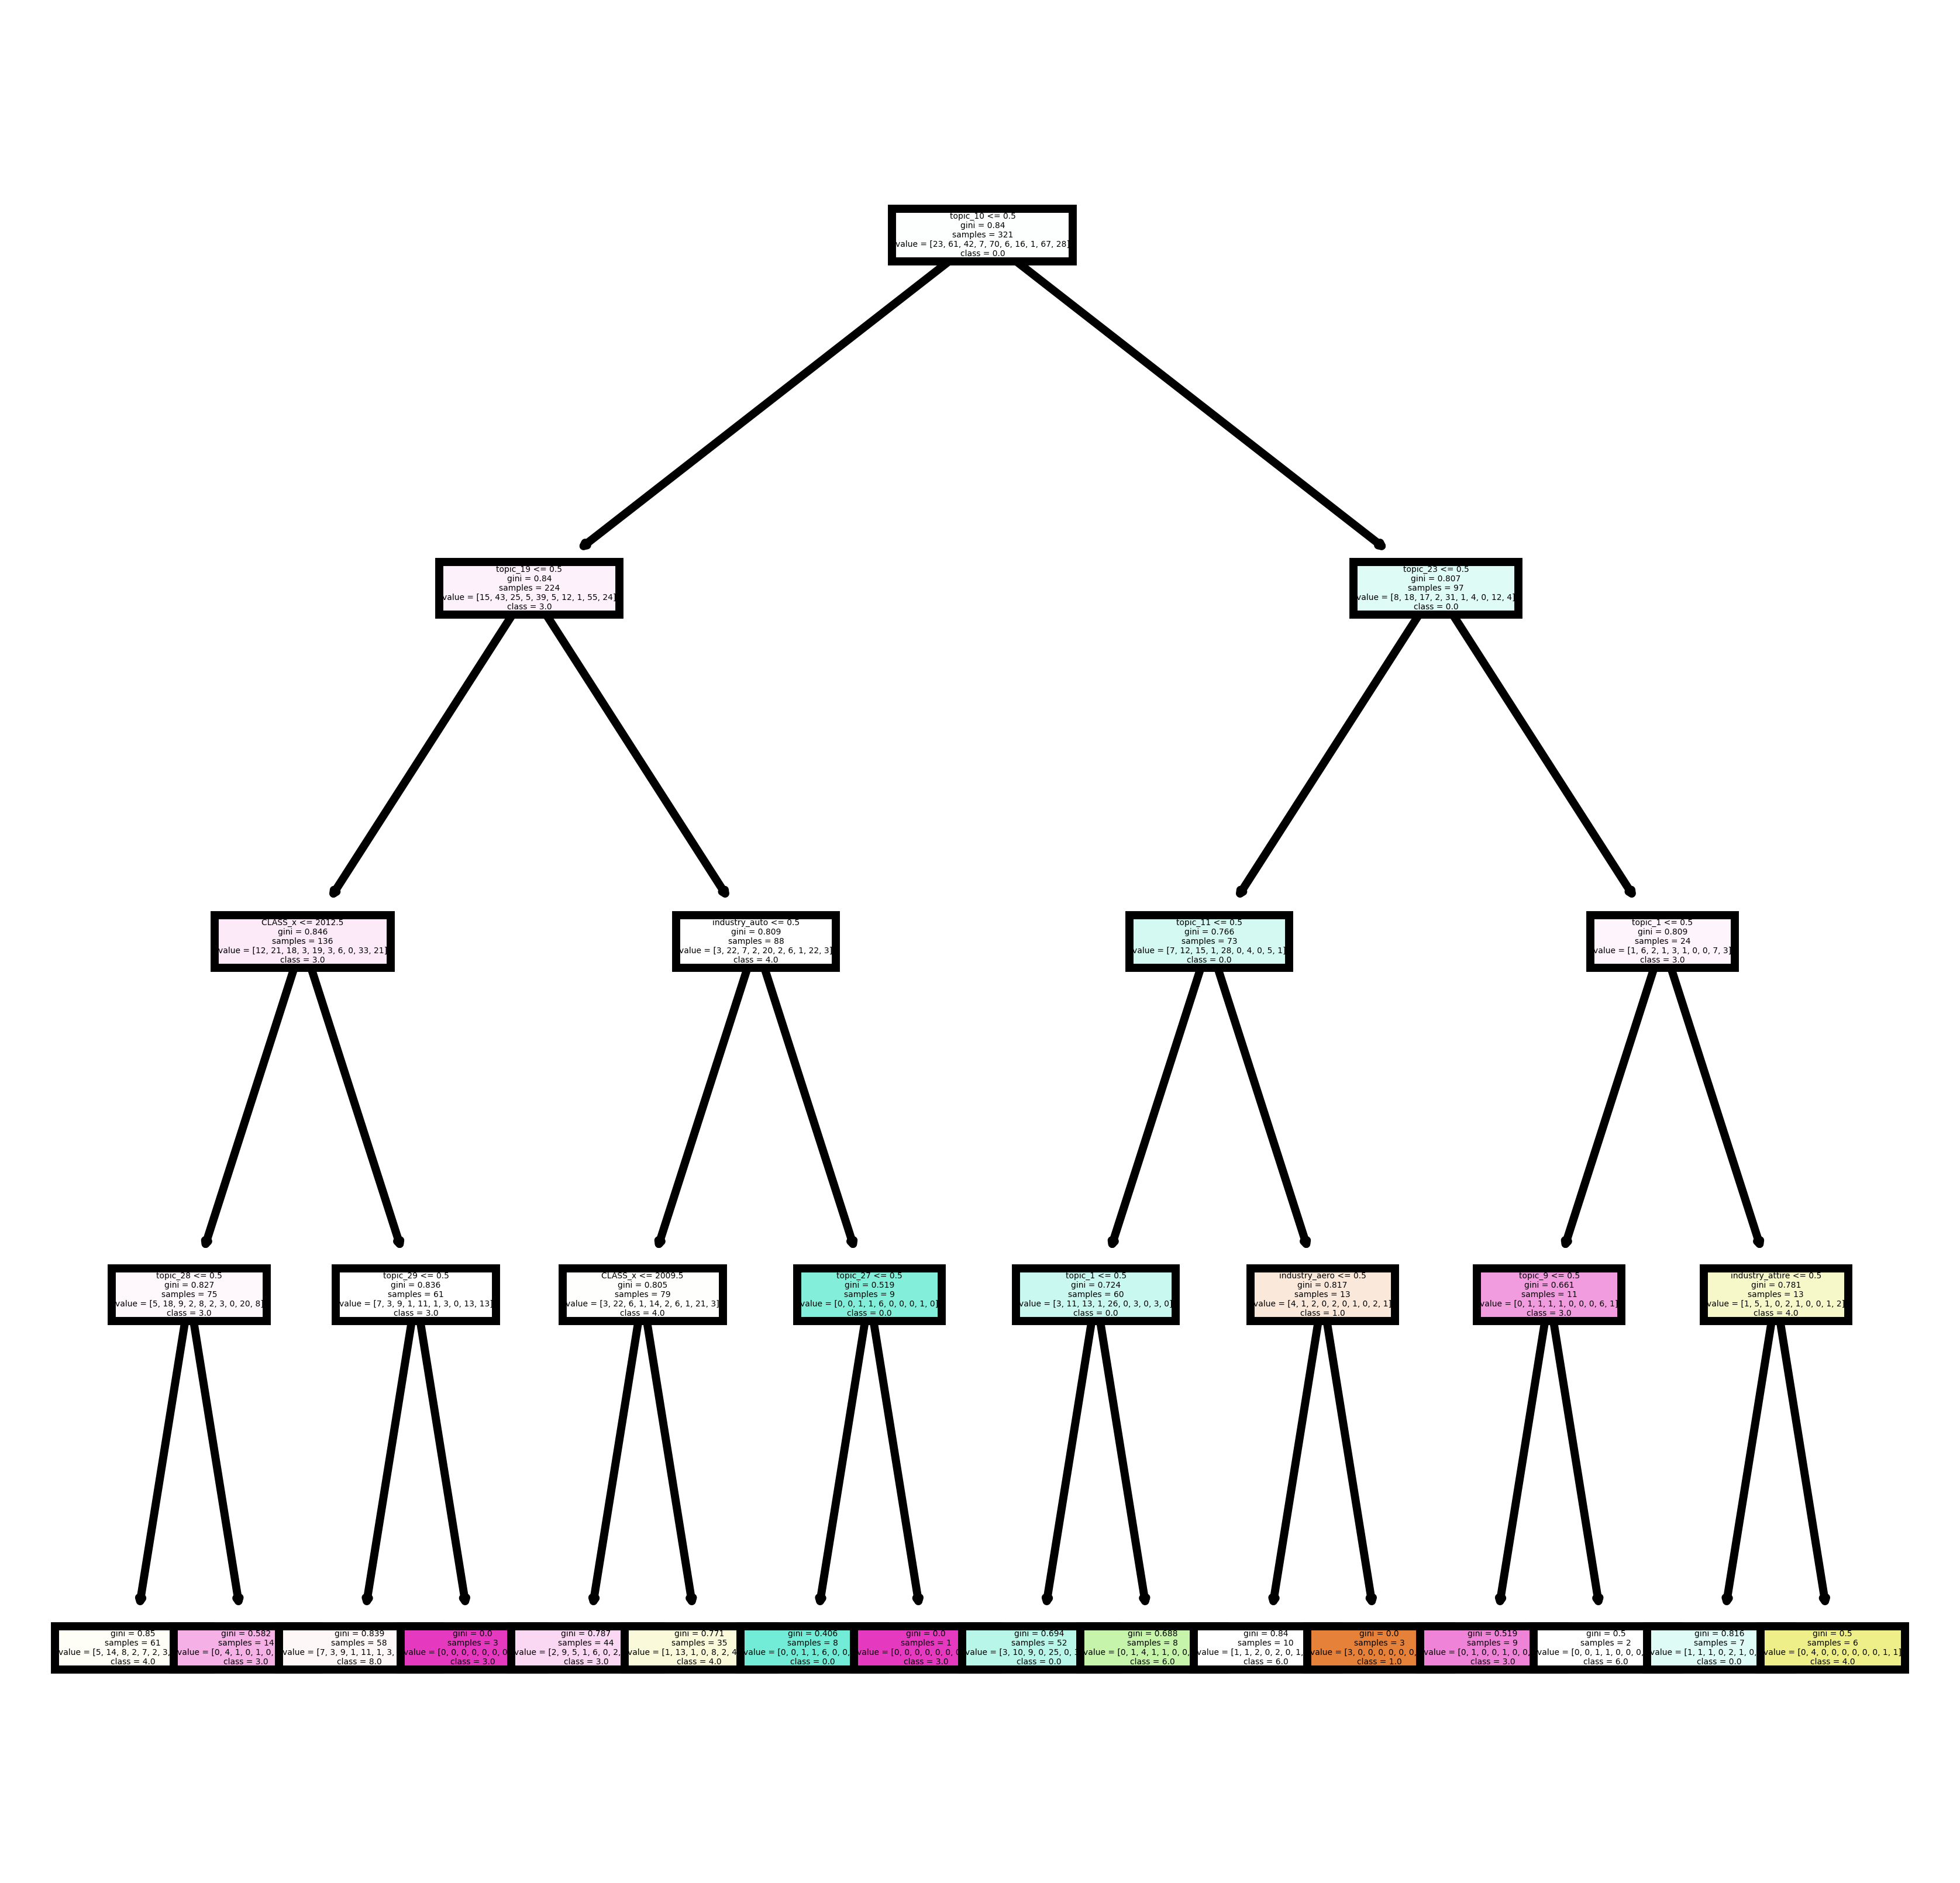

In [124]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
plot_tree(dtree_model,
               feature_names = feature_columns, 
               class_names=cluster_labels_names,
               filled = True);
fig.savefig('dtree_explainer.png')

Further analysis of the clustering and comprehend results over time

In [21]:
cols_to_select= ['thesis_id', 'CLASS_x','INTERNSHIP_COMPANY','industry','cluster_label','topic']

In [23]:
merged_df_for_analysis = merged_df_for_analysis[cols_to_select]

In [24]:
merged_df_for_analysis.head()

,thesis_id,CLASS_x,INTERNSHIP_COMPANY,industry,cluster_label,topic
0,0,2011,Spirit AeroSystems Inc.,aero,1.0,19
1,0,2011,Spirit AeroSystems Inc.,aero,1.0,28
2,0,2011,Spirit AeroSystems Inc.,aero,1.0,0
3,0,2011,Spirit AeroSystems Inc.,aero,1.0,1
4,0,2011,Spirit AeroSystems Inc.,aero,1.0,22


Filter df to focus on specific clusters and topics of interest from decision tree

In [40]:
clusters_of_interest = [0,1,3,4,6,8]
topics_of_interest = [1, 9, 10, 11, 23, 19, 28, 29, 27]
merged_df_for_analysis_subed_for_clust = merged_df_for_analysis[merged_df_for_analysis['cluster_label'].isin(clusters_of_interest)]
merged_df_for_analysis_subed_for_clust_topics = merged_df_for_analysis_subed_for_clust[merged_df_for_analysis_subed_for_clust['topic'].isin(topics_of_interest)]

Text(0, 0.5, 'Number of theses')

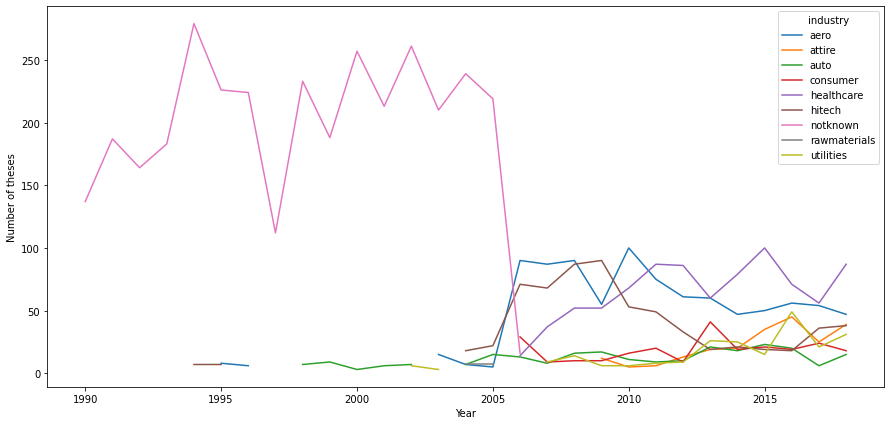

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
merged_df_for_analysis.groupby(['CLASS_x','industry']).size().unstack().plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of theses')



Text(0, 0.5, 'Number of theses')

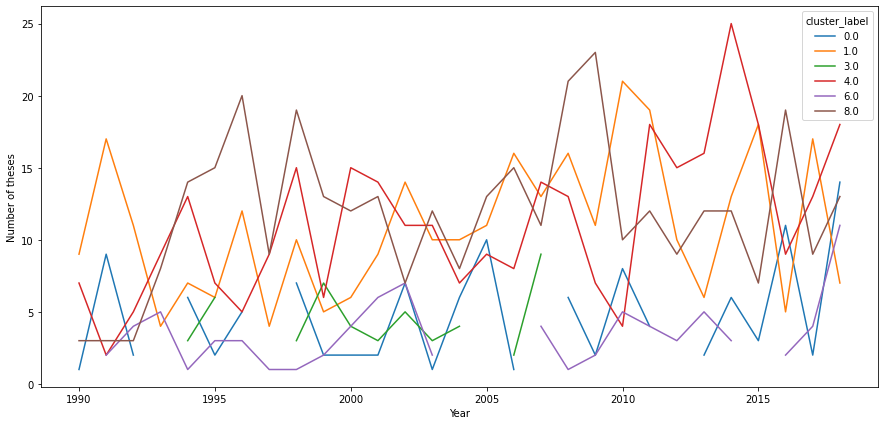

In [44]:
fig, ax = plt.subplots(figsize=(15,7))
merged_df_for_analysis_subed_for_clust_topics.groupby(['CLASS_x','cluster_label']).size().unstack().plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of theses')


Text(0, 0.5, 'Number of theses')

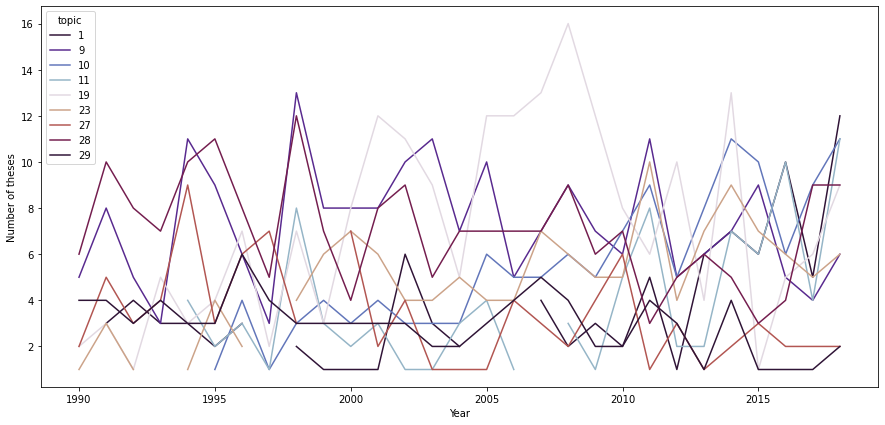

In [49]:
fig, ax = plt.subplots(figsize=(15,7))
merged_df_for_analysis_subed_for_clust_topics.groupby(['CLASS_x','topic']).size().unstack().plot(ax=ax, colormap='twilight_shifted')
ax.set_xlabel('Year')
ax.set_ylabel('Number of theses')
